# Explore I6S underway CTD

In [1]:
import numpy as np
from numpy.ma import masked_values as maval
import gsw
import xarray as xr
import pandas as pd
import os
import os.path as op
from datetime import datetime, timedelta
from scipy.interpolate import PchipInterpolator as pchip
from scipy.signal import medfilt
import dask.array as dsar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
import matplotlib.colors as clr
import matplotlib.ticker as tick
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cmocean as cmocean

%matplotlib inline

In [6]:
data_dir ="/Users/dhruvbalwada/OneDrive/sogos_data/"
data_folder = data_dir + "data/raw/cruise/"
fname = data_folder + "325020190403_UWpCO2.csv"

In [15]:
ds = pd.read_csv(fname, skiprows=4, na_values=-999)

In [17]:
ds

,Expocode,Group,Ship,YD_UTC,DATE_UTC__ddmmyyyy,TIME_UTC_hh:mm:ss,LAT_dec_degree,LONG_dec_degree,xCO2_EQU_ppm,xCO2_ATM_ppm,...,PRES_EQU_hPa,PRES_ATM@SSP_hPa,TEMP_EQU_C,SST_C,SAL_permil,fCO2_SW@SST_uatm,fCO2_ATM_interpolated_uatm,dfCO2_uatm,WOCE_QC_FLAG,QC_SUBFLAG
0,325020190403,NOAA PMEL,Thomas G. Thompson,98.75557,8042019,18:08:01,-33.92412,18.21846,NaN,407.577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
1,325020190403,NOAA PMEL,Thomas G. Thompson,98.75679,8042019,18:09:47,-33.93345,18.21847,NaN,407.447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,325020190403,NOAA PMEL,Thomas G. Thompson,98.75802,8042019,18:11:33,-33.93932,18.21846,NaN,407.193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
3,325020190403,NOAA PMEL,Thomas G. Thompson,98.75925,8042019,18:13:19,-33.94529,18.21841,NaN,407.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
4,325020190403,NOAA PMEL,Thomas G. Thompson,98.76049,8042019,18:15:06,-33.95122,18.21835,NaN,407.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15052,325020190403,NOAA PMEL,Thomas G. Thompson,134.19170,14052019,4:36:03,-33.99444,18.26202,NaN,409.793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
15053,325020190403,NOAA PMEL,Thomas G. Thompson,134.19293,14052019,4:37:49,-33.99036,18.26473,NaN,409.723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
15054,325020190403,NOAA PMEL,Thomas G. Thompson,134.19417,14052019,4:39:36,-33.98633,18.26743,NaN,409.663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
15055,325020190403,NOAA PMEL,Thomas G. Thompson,134.19539,14052019,4:41:22,-33.98237,18.27017,NaN,409.793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN


<AxesSubplot:>

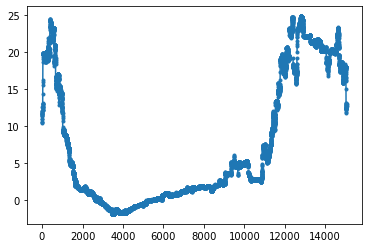

In [16]:
ds['SST_C'].plot(marker='.')

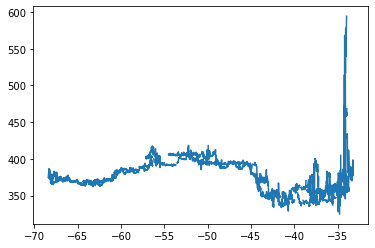

In [21]:
plt.plot(ds['LAT_dec_degree'], ds['fCO2_SW@SST_uatm'])

(-30.0, 30.0)

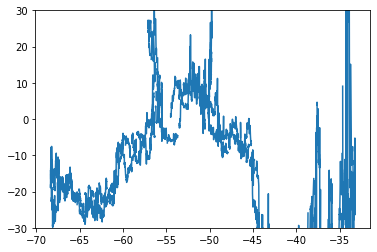

In [23]:
plt.plot(ds['LAT_dec_degree'], ds['dfCO2_uatm'])
plt.ylim([-30, 30])